In [1]:
import scanpy as sc
from subtype_analysis import *

In [2]:
dataset = "XeniumLungCancer"
ad = sc.read_h5ad("E:/SZ/Results/" + dataset + "/" + dataset + "_GWT_anndata.h5ad")

# assign cell type to each cluster
if dataset == 'XeniumLungCancer':
    ad.obs['leiden_Raw_res1_origin'] = ad.obs['leiden_Raw_res1'].copy()
    print(np.unique(ad.obs['leiden_Raw_res1']))
    new_cluster_names = [
        "AT2_CYP2B6", # 0 
        "Basal Epithelial", #  1 Basal Epithelial
        "T",# 2 MS4A4A, MS4A6A
        "AT2_SFTA2",# 3 GPRC5A, EPCAM, MALL, GPX2, TMC5, EHF, MET, MDM2, MET
        "CAF", #4 CFB, CFTR, FXYD2
        "Macrophage",#5,分不清是ductal还是Exocrine_glandular_cells
        "Secretory Epithelial",#6, CD163混杂了上皮
        "Endothelial",#7 
        "Plasma",#8 Endothelial, VWF, PECAM1, CD34, CD93, PDGFRB
        "Smooth Muscle",#9, CD34, CD93
        "Mast",#10, CHGA, GCG	, INS
        "Ciliated"
    ]
    ad.rename_categories("leiden_Raw_res1", new_cluster_names)
    print(np.unique(ad.obs['leiden_Raw_res1']))
ad

['C0' 'C1' 'C10' 'C11' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9']
['AT2_CYP2B6' 'AT2_SFTA2' 'Basal Epithelial' 'CAF' 'Ciliated'
 'Endothelial' 'Macrophage' 'Mast' 'Plasma' 'Secretory Epithelial'
 'Smooth Muscle' 'T']


AnnData object with n_obs × n_vars = 149195 × 377
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region', 'z_level', 'nucleus_count', 'cell_labels', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'Kmeans_Raw', 'leiden_Raw_res0.4', 'leiden_Raw_res0.6', 'leiden_Raw_res0.8', 'leiden_Raw_res1', 'leiden_Raw_res1.2', 'Kmeans_scale0.01', 'leiden_scale0.01_res0.4', 'leiden_scale0.01_res0.6', 'leiden_scale0.01_res0.8', 'leiden_scale0.01_res1', 'leiden_scale0.01_res1.2', 'Kmeans_scale1.0', 'leiden_scale1.0_res0.4', 'leiden_scale1.0_res0.6', 'leiden_scale1.0_res0.8', 'leiden_scale1.0_res1', 'leiden_scale1.0_res1.2', 'Kmeans_scale2.5', 'leiden_scale2.5_res0.4', 'leiden_scale2.5_res0.6', 'leiden_s

c:\Users\fyh\miniconda3\envs\pycogaps\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1154: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([], [], c=palette[label], label=label)


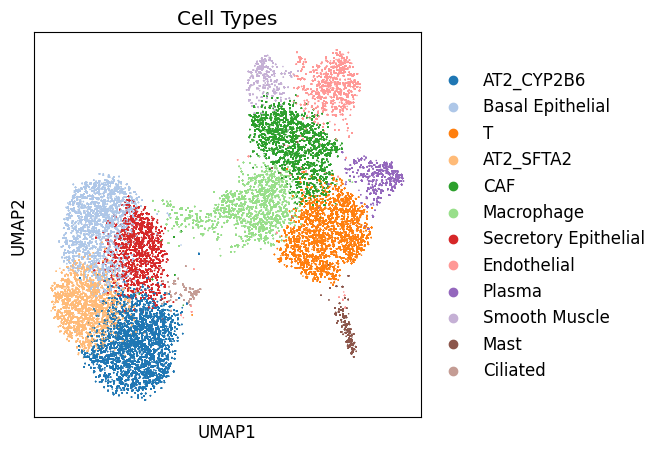

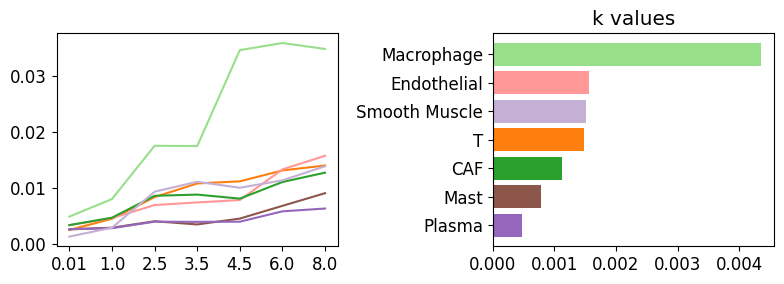

In [3]:
save_path = "./results/" + dataset + "/"
umap_keys, var_dict, k_dict, selected_cluster_recommend = calculate_metrics(ad=ad, save_path=save_path)

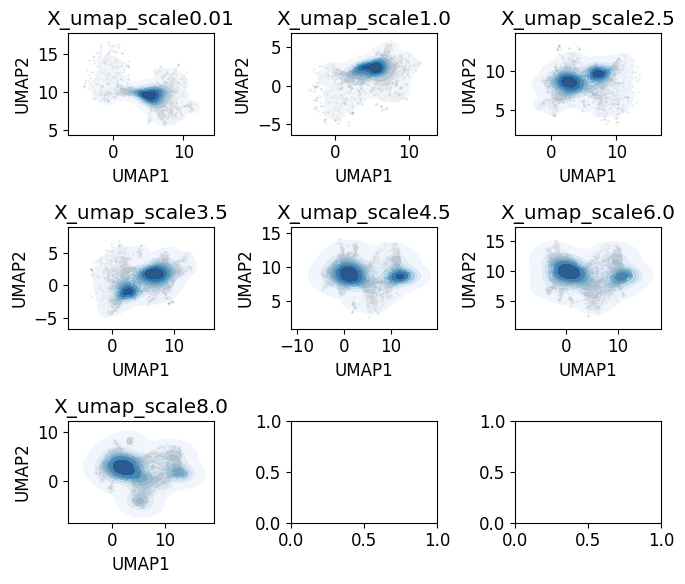

In [4]:
selected_cluster = selected_cluster_recommend
# selected_cluster = "Macrophage"    # define the cluster you want to analyze here

ad_selected = ad[ad.obs['leiden_Raw_res1'] == selected_cluster]
kde_plot(ad_selected=ad_selected, save_path=save_path)

In [5]:
optimal_scale = find_optimal_scale(var_dict[selected_cluster], umap_keys=umap_keys)
print("optimal_scale: ", optimal_scale)

optimal_scale:  4.5


c:\Projects\spatialzoomer\code\subtype_analysis.py:216: ImplicitModificationWarning: Setting element `.obsm['X_umap']` of view, initializing view as actual.
  ad_selected.obsm['X_umap'] = ad_selected.obsm['X_umap_scale' + str(optimal_scale)]
c:\Projects\spatialzoomer\code\subtype_analysis.py:222: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  ad_selected_plot.uns['cluster_label_colors'] = [colors_3[1], colors_3[0]]


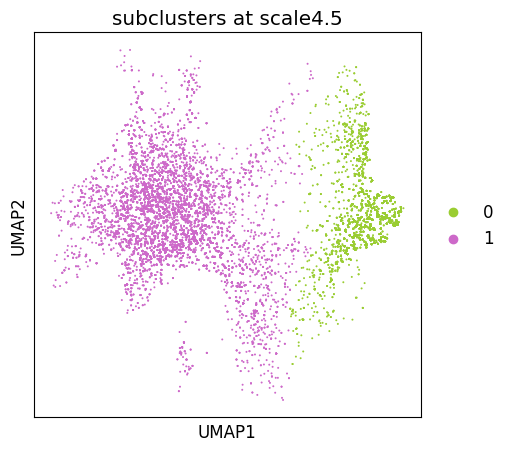

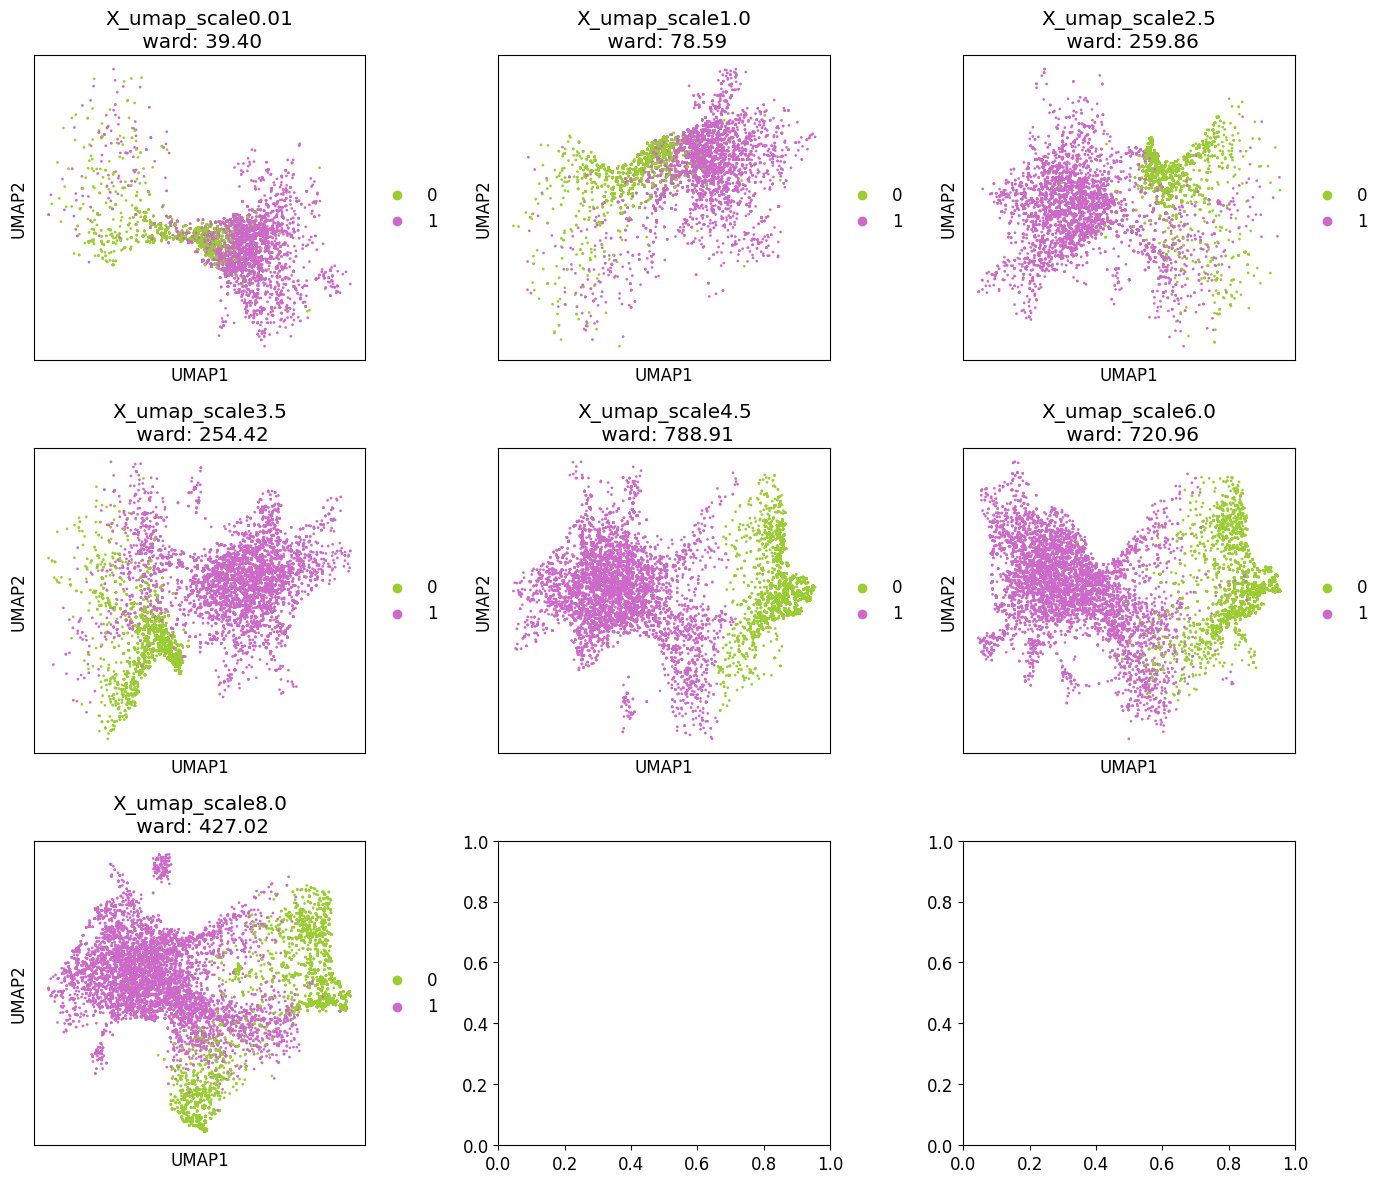

In [6]:
# optimal_scale = 4.5 # manually set the optimal scale here
ad_selected_plot, ward_list = detect_subclusters(ad_selected=ad_selected, save_path=save_path, optimal_scale=optimal_scale)